In [1]:
import jieba
import pandas as pd
import numpy as np
from imageio import imread
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
#定义语料文件路径
file = 'D:\毕设code\\news_data_from2016to2021\\2016\ER_NewsInfo.xlsx'
#定义停用词文件路径
stop_words = 'D:\chrome\Listed-company-news-crawl-and-text-analysis-master\src\Leorio\chnstopwords.txt'
#定义wordcloud中字体文件的路径
simhei = 'D:\mnt\Windows\Fonts\simhei.ttf'

In [3]:
df = pd.read_excel(file)

In [4]:
df.head()

,DeclareDate,ClassifyID,Classify,Title,NewsContent,Symbol
0,2016-01-02 16:50:48,02010305,证券市场,中概股掀私有化浪潮 注册制推进将加速中概股回归,"A股市场去年四季度以来的企稳,以及世纪游轮被借壳后连续20个涨停,在一定程度上重新点燃了...",NaN
1,2016-01-03 20:10:40,02010305,证券市场,2016年券商最看好的公司与行业(名单),新年伊始，主流券商对2016年股市的看法如何？从各大券商的2016年策略报告来看，相较于...,NaN
2,2016-01-03 20:11:54,02010305,证券市场,12位私募大佬展望2016年：迎来更可靠的5000点,A股挥别惊心动魄的2015年，2016年又会演绎怎样的行情呢？在新的一年里，投资机会的方...,NaN
3,2016-01-03 20:13:00,02010305,证券市场,万亿资金进场利好蓝筹股 银行股行情最被看好,2015年人民币国际化无疑是年度性事件。分析人士认为，人民币加入SDR有望带来万亿元增量...,NaN
4,2016-01-03 20:14:20,02010305,证券市场,新年必读：2016年这十件大事将影响A股,2016年，是A股制度变革的大年，我们期待慢牛、健康牛。在此，我们梳理了2016年可能影...,NaN


In [5]:
#如果存在nan，删除
df.dropna(inplace=True)
#将content一列转为list
content=df['NewsContent'].values.tolist()

In [6]:
segment=[]
for line in content:
    try:
        segs=jieba.cut_for_search(line)
        segs = [v for v in segs if not str(v).isdigit()]#去数字
        segs = list(filter(lambda x:x.strip(), segs))   #去左右空格
        #segs = list(filter(lambda x:len(x)>1, segs)) #长度为1的字符
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.261 seconds.
Prefix dict has been built successfully.


In [7]:
words_df=pd.DataFrame({'segment':segment})

In [8]:
#加载停用词
stopwords=pd.read_csv(stop_words,index_col=False,quoting=3,sep="\t",names=['stopword'],encoding='gbk')

In [9]:
#安装关键字groupby分组统计词频，并按照计数降序排序
words_stat=words_df.groupby(by=['segment'])['segment'].agg(np.size)
words_stat = words_stat.to_frame()
words_stat.columns = ['计数']
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

In [10]:
words_stat

,segment,计数
38602,公司,90627
33788,亿元,21107
91625,股份,20648
65123,投资,19419
91608,股东,17299
...,...,...
45143,却现,1
45146,卵巢,1
45147,卵巢癌,1
45152,卷材,1


In [11]:
#分组之后去掉停用词
words_stat=words_stat[~words_stat.segment.isin(stopwords.stopword)]

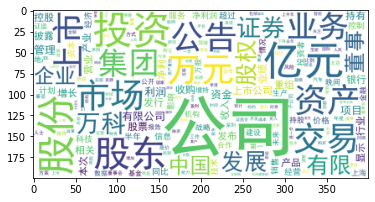

In [12]:
#第一种是默认的样式
wordcloud=WordCloud(font_path=simhei,background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud_1.jpg')  #保存结果

In [13]:
abel_mask = imread("china.jpg")  #这里设置了一张中国地图
text = " ".join(words_stat['segment'].head(100).astype(str))
wordcloud2 = WordCloud(background_color='white',  # 设置背景颜色
                     mask = abel_mask,  # 设置背景图片
                     max_words = 3000,  # 设置最大现实的字数
                     font_path = simhei,  # 设置字体格式
                     width=2048,
                     height=1024,
                     scale=4.0,
                     max_font_size= 300,  # 字体最大值
                     random_state=42).generate(text)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
wordcloud2.recolor(color_func=image_colors)
# 以下代码显示图片
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()
wordcloud2.to_file('wordcloud_2.jpg') #保存结果

FileNotFoundError: No such file: 'd:\毕设code\preprocessing\china.jpg'